<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Ayudantia/Inf_Ayud_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def T_F(X):
    return((np.quantile(X,0.75)-np.quantile(X,0.25))/1.34)

Estimation T.hat:  1.4222051531869766 

Normal interval:  ( 0.7604314144651186 2.0839788919088345 )
Percentile interval:  ( 0.7246196945236993 1.8932916331582994 )
Pivotal interval:  ( 0.9511186732156538 2.119790611850254 )


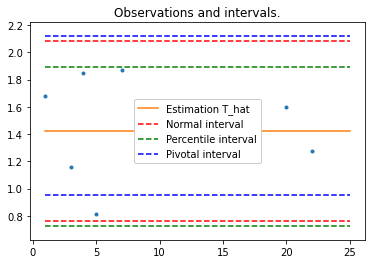

In [4]:
np.random.seed(0)
X=np.random.standard_t(3,size=25)
def bootstrap_intervals(X,T,B=10000):
    estimations=[T(X)]
    for i in range(B):
        X_s=np.random.choice(X,len(X))
        estimations.append(T(X_s))
    se=np.std(estimations)
    print("Estimation T.hat: ", estimations[0],"\n")
    #Intervalos.
    print("Normal interval: ","(",estimations[0]-2*se,estimations[0]+2*se,")")
    print("Percentile interval: ","(",np.quantile(estimations,0.025),np.quantile(estimations,0.975),")")#Percentile, quantile
    print("Pivotal interval: ","(",2*estimations[0]-np.quantile(estimations,0.975),2*estimations[0]-np.quantile(estimations,0.025),")")
    return [[estimations[0]-2*se,estimations[0]+2*se],[np.quantile(estimations,0.025),np.quantile(estimations,0.975)],[2*estimations[0]-np.quantile(estimations,0.975),2*estimations[0]-np.quantile(estimations,0.025)]]
    
intervals=bootstrap_intervals(X,T=T_F)
I1='Normal interval'
I2='Percentile interval'
I3='Pivotal interval'
plt.plot(range(1,26),X,'.')
plt.plot(range(1,26),[np.mean(intervals[0])]*25,label='Estimation T_hat')
plt.plot(range(1,26), [intervals[0][1]]*25,'r--')
plt.plot(range(1,26), [intervals[0][0]]*25,'r--',label=I1)
plt.plot(range(1,26), [intervals[1][1]]*25,'g--')
plt.plot(range(1,26), [intervals[1][0]]*25,'g--',label=I2)
plt.plot(range(1,26), [intervals[2][1]]*25,'b--')
plt.plot(range(1,26), [intervals[2][0]]*25,'b--',label=I3)
plt.ylim((np.min(intervals)-0.1,np.max(intervals)+0.1))
plt.legend(framealpha=1, frameon=True);
plt.title('Observations and intervals.')
plt.show()

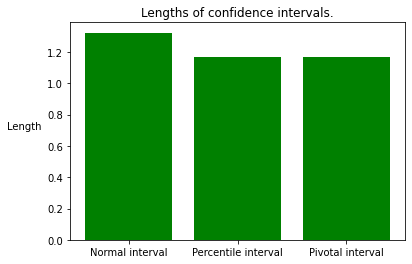

In [5]:
def length(I):
    return I[1]-I[0]
plt.bar([I1,I2,I3],[length(i) for i in intervals],color='green')
plt.ylabel('Length            ',rotation=0)
plt.title('Lengths of confidence intervals.')
plt.show()